In [ ]:
#@title ##### 텐서 차원 맞추기 연습 #####

import torch
import torch.nn as nn

# 예시를 위한 설정
image_size = 4   # 시각화를 위해 간단한 4x4 이미지로 가정
num_classes = 2  # 예시에서는 0과 1, 두 개의 클래스만 사용
batch_size = 5   # 배치 크기 4

# 임의의 이미지 텐서 (여기서는 값은 임의로 생성)
img = torch.randn(batch_size, 1, image_size, image_size)
# 예시 라벨: [0, 1, 0, 0]
labels = torch.tensor([0, 1, 0, 0, 1])
print("원본 라벨:", labels)  # tensor([0, 1, 0, 0, 1])

# 임베딩 레이어 정의: 각 클래스당 1차원 벡터 (실제 학습 시엔 임의의 값으로 초기화됨)
label_emb = nn.Embedding(num_classes, 1)
# 예시를 위해 임베딩 가중치를 고정(쉽게 이해하기 위해)
# 클래스 0은 값 0.5, 클래스 1은 값 -0.5라고 가정해보겠습니다.
with torch.no_grad():
    label_emb.weight[0] = torch.tensor([0.5])
    label_emb.weight[1] = torch.tensor([-0.5])

# 1. 라벨 임베딩
embedded = label_emb(labels)
print("임베딩 결과 (shape):", embedded.shape)
print("임베딩 결과 (값):", embedded)
# 예시 출력: tensor([[ 0.5000],
#                   [-0.5000],
#                   [ 0.5000],
#                   [ 0.5000],
#                   [-0.5000]])

# 2. view를 이용해 shape 재구성: [batch_size, 1, 1, 1]
embedded_view = embedded.view(batch_size, 1, 1, 1)
print("view 후 shape:", embedded_view.shape)
# 출력: torch.Size([5, 1, 1, 1])

# 3. expand를 사용해 라벨 텐서를 이미지 크기로 확장: [batch_size, 1, image_size, image_size]
embedded_expanded = embedded_view.expand(batch_size, 1, image_size, image_size)
print("expand 후 shape:", embedded_expanded.shape)
# 출력: torch.Size([5, 1, 4, 4])
print("expand 후 값 (첫번째 예시):\n", embedded_expanded[0])
# 첫번째 예시의 경우, 클래스 0의 값인 0.5가 4x4 전체에 복사된 텐서가 출력됩니다.

# 4. 이미지 텐서와 라벨 텐서를 채널 차원에서 결합
# 원래 이미지(img)의 shape: [5, 1, 4, 4]
# 확장된 라벨의 shape: [5, 1, 4, 4]
d_in = torch.cat((img, embedded_expanded), 1)
print("결합 후 텐서 shape:", d_in.shape)
# 출력: torch.Size([5, 2, 4, 4])


원본 라벨: tensor([0, 1, 0, 0, 1])
임베딩 결과 (shape): torch.Size([5, 1])
임베딩 결과 (값): tensor([[ 0.5000],
        [-0.5000],
        [ 0.5000],
        [ 0.5000],
        [-0.5000]], grad_fn=<EmbeddingBackward0>)
view 후 shape: torch.Size([5, 1, 1, 1])
expand 후 shape: torch.Size([5, 1, 4, 4])
expand 후 값 (첫번째 예시):
 tensor([[[0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000]]], grad_fn=<SelectBackward0>)
결합 후 텐서 shape: torch.Size([5, 2, 4, 4])


{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
Epoch [1/30]  D_loss: 0.8103  G_loss: 1.3673  D(x): 0.69  D(G(z)): 0.31
Epoch [2/30]  D_loss: 0.7370  G_loss: 1.5506  D(x): 0.72  D(G(z)): 0.28
Epoch [3/30]  D_loss: 0.7350  G_loss: 1.6246  D(x): 0.73  D(G(z)): 0.27
Epoch [4/30]  D_loss: 0.7457  G_loss: 1.6535  D(x): 0.73  D(G(z)): 0.27
Epoch [5/30]  D_loss: 0.7157  G_loss: 1.7373  D(x): 0.74  D(G(z)): 0.26
Epoch [6/30]  D_loss: 0.7070  G_loss: 1.7753  D(x): 0.74  D(G(z)): 0.26
Epoch [7/30]  D_loss: 0.7086  G_loss: 1.8159  D(x): 0.74  D(G(z)): 0.26
Epoch [8/30]  D_loss: 0.7051  G_loss: 1.8417  D(x): 0.75  D(G(z)): 0.25
Epoch [9/30]  D_loss: 0.7172  G_loss: 1.8467  D(x): 0.74  D(G(z)): 0.26
Epoch [10/30]  D_loss: 0.7409  G_loss: 1.8231  D(x): 0.74  D(G(z)): 0.26


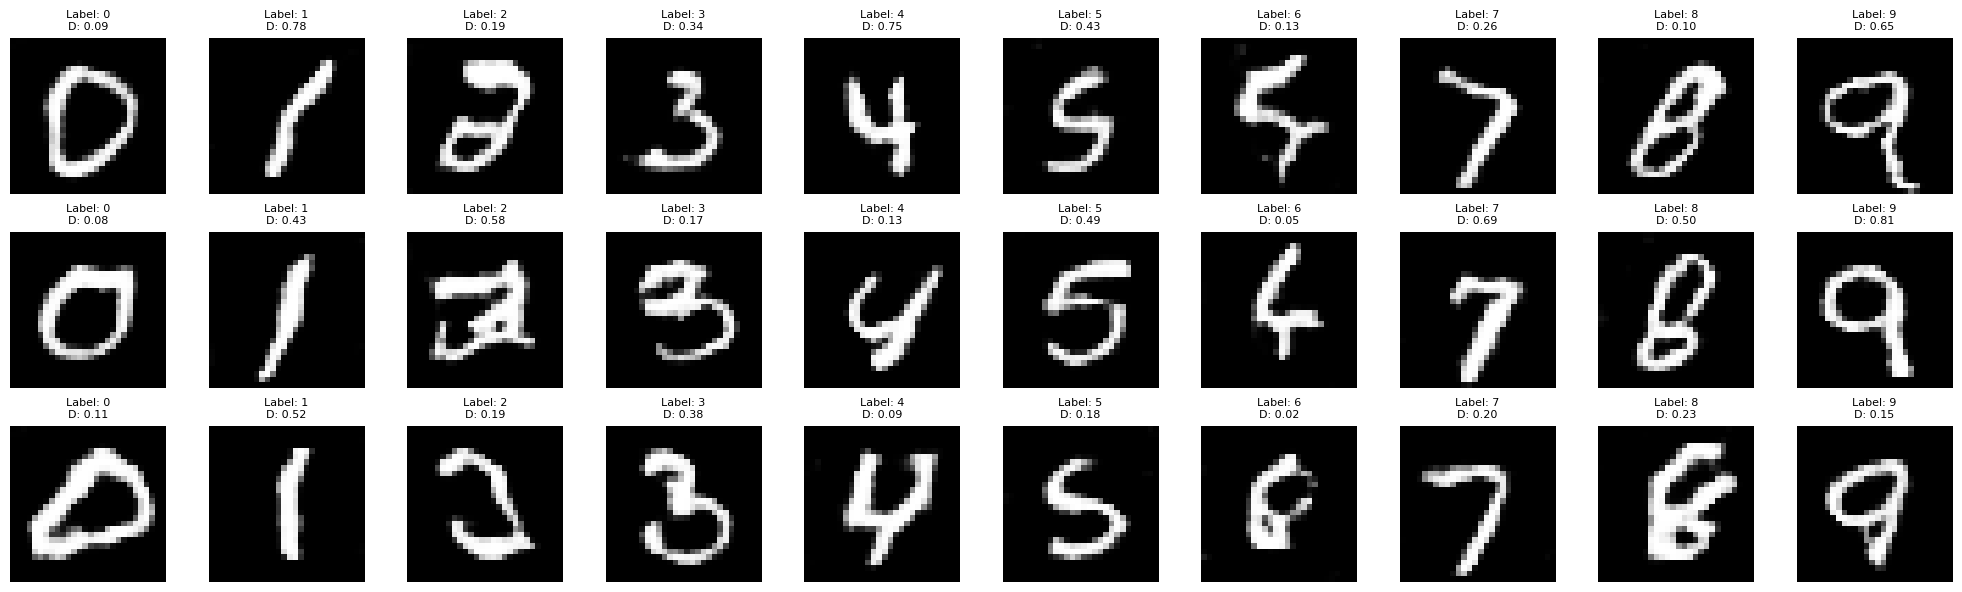

Epoch [11/30]  D_loss: 0.7449  G_loss: 1.7940  D(x): 0.74  D(G(z)): 0.26
Epoch [12/30]  D_loss: 0.7598  G_loss: 1.7794  D(x): 0.73  D(G(z)): 0.27
Epoch [13/30]  D_loss: 0.7726  G_loss: 1.7608  D(x): 0.73  D(G(z)): 0.27
Epoch [14/30]  D_loss: 0.7692  G_loss: 1.7682  D(x): 0.73  D(G(z)): 0.27
Epoch [15/30]  D_loss: 0.7613  G_loss: 1.7768  D(x): 0.73  D(G(z)): 0.27
Epoch [16/30]  D_loss: 0.7536  G_loss: 1.7954  D(x): 0.73  D(G(z)): 0.27
Epoch [17/30]  D_loss: 0.7519  G_loss: 1.8107  D(x): 0.74  D(G(z)): 0.26
Epoch [18/30]  D_loss: 0.7479  G_loss: 1.8195  D(x): 0.74  D(G(z)): 0.26
Epoch [19/30]  D_loss: 0.7453  G_loss: 1.8313  D(x): 0.74  D(G(z)): 0.26
Epoch [20/30]  D_loss: 0.7475  G_loss: 1.8406  D(x): 0.74  D(G(z)): 0.26


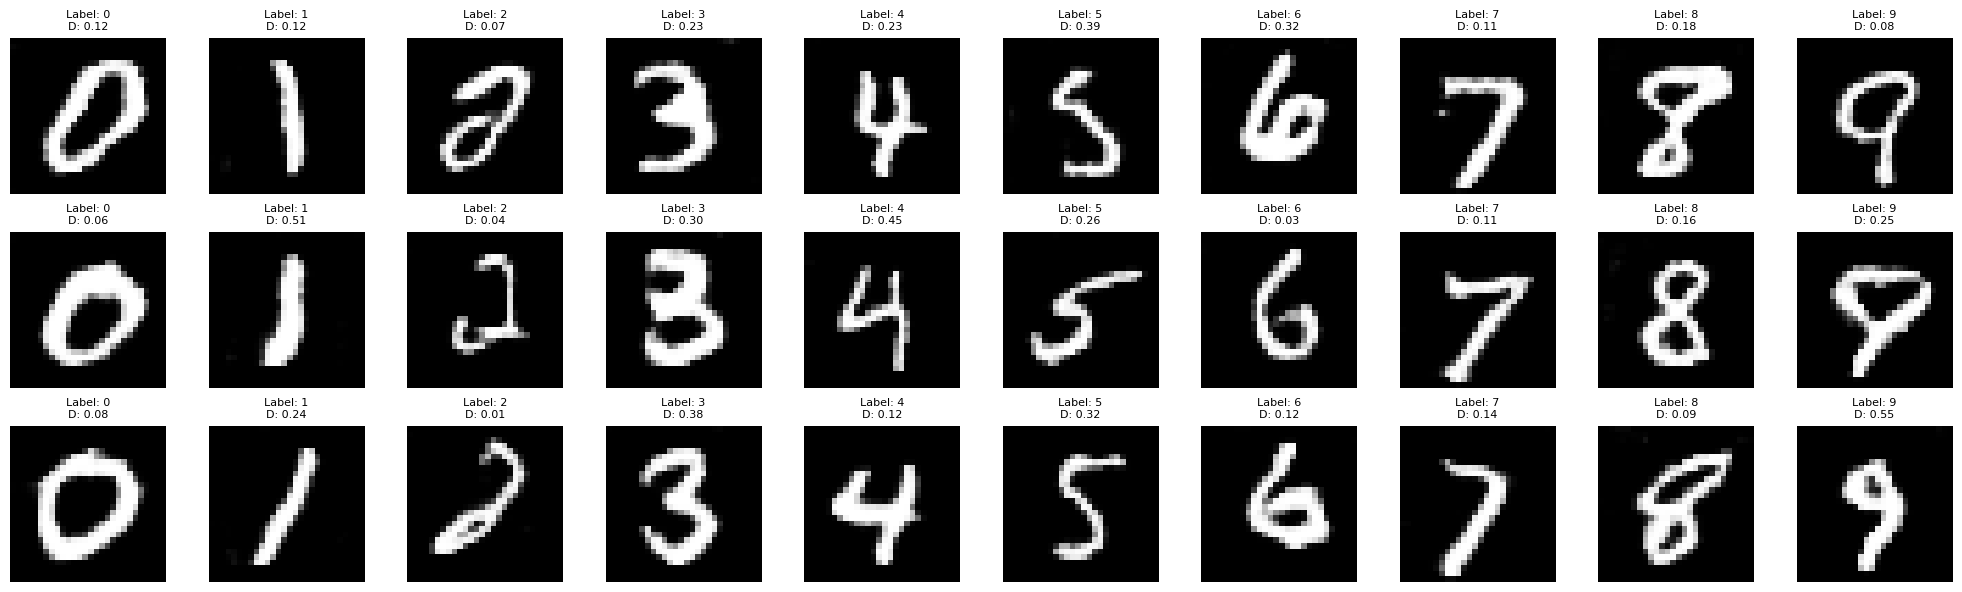

Epoch [21/30]  D_loss: 0.7311  G_loss: 1.8594  D(x): 0.74  D(G(z)): 0.26
Epoch [22/30]  D_loss: 0.7317  G_loss: 1.8765  D(x): 0.74  D(G(z)): 0.26
Epoch [23/30]  D_loss: 0.7206  G_loss: 1.9040  D(x): 0.75  D(G(z)): 0.25
Epoch [24/30]  D_loss: 0.7170  G_loss: 1.9091  D(x): 0.75  D(G(z)): 0.25
Epoch [25/30]  D_loss: 0.7061  G_loss: 1.9266  D(x): 0.75  D(G(z)): 0.25
Epoch [26/30]  D_loss: 0.6935  G_loss: 1.9653  D(x): 0.76  D(G(z)): 0.24
Epoch [27/30]  D_loss: 0.6910  G_loss: 1.9769  D(x): 0.76  D(G(z)): 0.24
Epoch [28/30]  D_loss: 0.6829  G_loss: 1.9925  D(x): 0.76  D(G(z)): 0.24
Epoch [29/30]  D_loss: 0.6881  G_loss: 2.0012  D(x): 0.76  D(G(z)): 0.24
Epoch [30/30]  D_loss: 0.6676  G_loss: 2.0222  D(x): 0.76  D(G(z)): 0.24


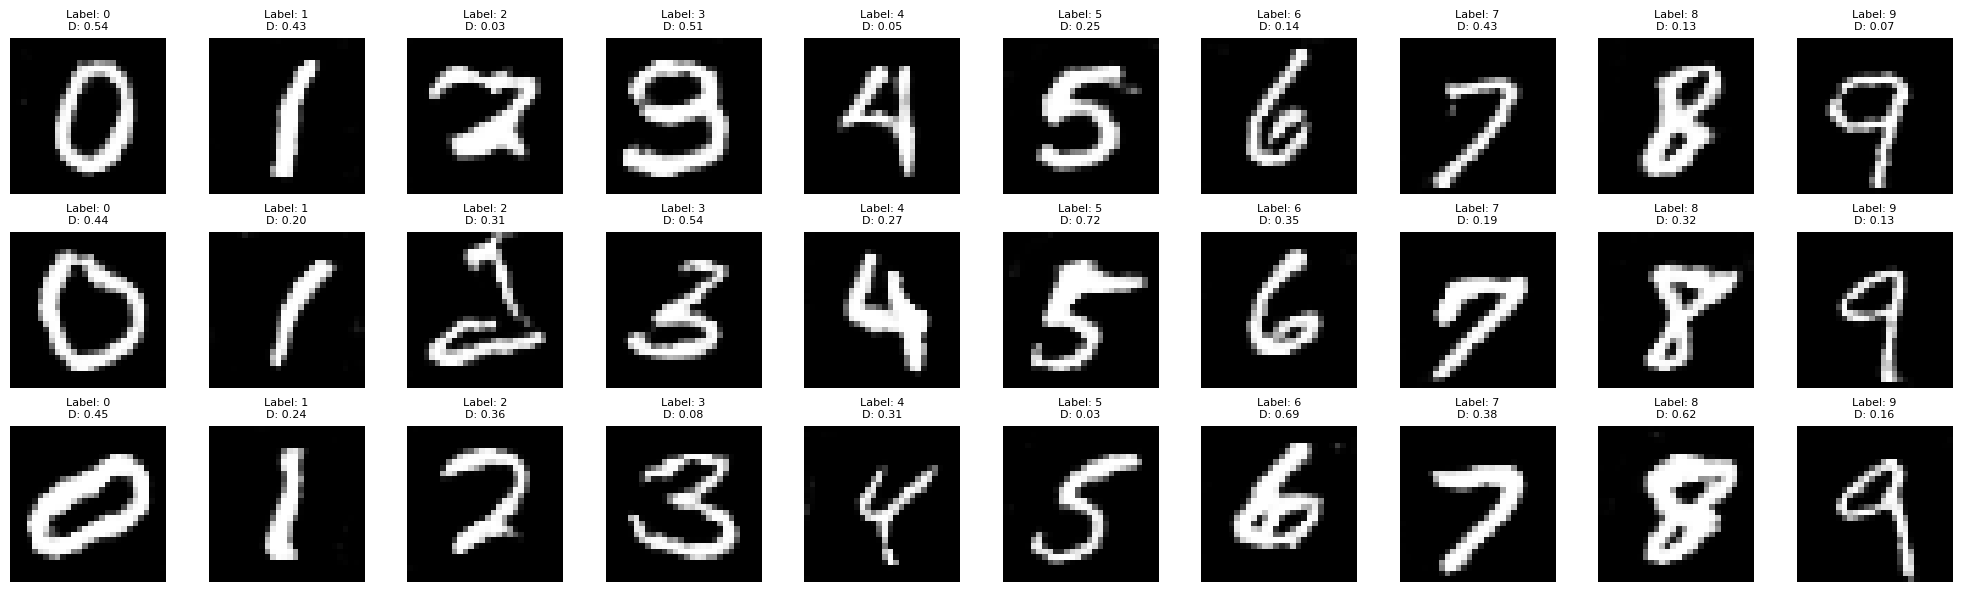

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터셋 및 DataLoader 설정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # [-1, 1] 범위로 정규화
])

# MNIST 데이터셋 사용
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 클래스 이름 (MNIST는 0~9 숫자)
idx_to_class = {i: str(i) for i in range(10)}
print(idx_to_class)

image_size = 28      # MNIST 이미지 크기
num_classes = 10     # 10개 클래스 (0~9)
latent_dim = 100     # 잠재 공간 차원

# 생성자 (Generator)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # 레이블 임베딩
        self.label_emb = nn.Embedding(num_classes, num_classes) #--> 10 * 10 like one-hot

        self.init_size = image_size // 4  # 7

        self.l1 = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 128 * self.init_size * self.init_size),
            nn.ReLU(inplace=True)
        )

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),  # 7 → 14
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2),  # 14 → 28
            nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1),
            nn.Tanh()  # 출력 범위 [-1, 1]
        )

    def forward(self, noise, labels):
        label_input = self.label_emb(labels)
        gen_input = torch.cat((noise, label_input), -1)
        out = self.l1(gen_input)
        out = out.view(out.size(0), 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img

# 판별자 (Discriminator)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # 레이블을 단일 채널 값으로 임베딩
        self.label_emb = nn.Embedding(num_classes, 1)

        self.model = nn.Sequential(
            # 이미지(1 채널)와 레이블(1 채널)을 채널 차원에서 결합하여 2채널로 입력
            nn.Conv2d(1 + 1, 64, kernel_size=3, stride=2, padding=1),  # 28 → 14
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),      # 14 → 7
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Flatten(),
            nn.Linear(128 * (image_size // 4) * (image_size // 4), 1),   # 128*7*7
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        batch_size = img.size(0)
        label = self.label_emb(labels)
        label = label.view(batch_size, 1, 1, 1)
        label = label.expand(batch_size, 1, image_size, image_size)
        # 이미지와 레이블을 채널 차원에서 연결
        d_in = torch.cat((img, label), 1)
        validity = self.model(d_in)
        return validity

# 모델 초기화
generator = Generator().to(device)
discriminator = Discriminator().to(device)

epochs = 30
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# 학습 루프 (에포크마다 D(x)와 D(G(z)) 평균 점수 계산)
for epoch in range(epochs):
    running_d_loss = 0.0
    running_g_loss = 0.0
    d_x_total = 0.0
    d_gz_total = 0.0
    total_samples = 0

    for i, (imgs, labels) in enumerate(train_loader):
        batch_size_current = imgs.size(0)
        total_samples += batch_size_current
        imgs = imgs.to(device)
        labels = labels.to(device)

        valid = torch.ones(batch_size_current, 1, device=device)
        fake  = torch.zeros(batch_size_current, 1, device=device)

        # 판별자 학습
        optimizer_D.zero_grad()
        # 실제 이미지에 대한 판별자 출력
        real_pred = discriminator(imgs, labels)
        real_loss = criterion(real_pred, valid)
        d_x_total += real_pred.mean().item() * batch_size_current

        noise = torch.randn(batch_size_current, latent_dim, device=device)
        gen_labels = labels  # (여기서는 입력된 라벨 사용)
        gen_imgs = generator(noise, gen_labels)
        # 가짜 이미지에 대한 판별자 출력
        fake_pred = discriminator(gen_imgs.detach(), labels)
        fake_loss = criterion(fake_pred, fake)
        d_gz_total += fake_pred.mean().item() * batch_size_current

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # 생성자 학습
        optimizer_G.zero_grad()
        g_loss = criterion(discriminator(gen_imgs, labels), valid)
        g_loss.backward()
        optimizer_G.step()

        running_d_loss += d_loss.item() * batch_size_current
        running_g_loss += g_loss.item() * batch_size_current

    avg_d_loss = running_d_loss / total_samples
    avg_g_loss = running_g_loss / total_samples
    avg_d_x = d_x_total / total_samples
    avg_d_gz = d_gz_total / total_samples

    print(f"Epoch [{epoch+1}/{epochs}]  D_loss: {avg_d_loss:.4f}  G_loss: {avg_g_loss:.4f}  D(x): {avg_d_x:.2f}  D(G(z)): {avg_d_gz:.2f}")

    # 10 에포크마다 생성 이미지 시각화 (각 클래스별로 3개씩 출력)
    if (epoch + 1) % 10 == 0:
        generator.eval()
        n_row = 3               # 각 클래스당 3개씩
        n_col = num_classes     # 총 10개 클래스
        total_samples_vis = n_row * n_col
        noise = torch.randn(total_samples_vis, latent_dim, device=device)
        labels_sample = torch.arange(0, num_classes, device=device).repeat(n_row)
        with torch.no_grad():
            gen_imgs = generator(noise, labels_sample)
            disc_out = discriminator(gen_imgs, labels_sample)
        gen_imgs = gen_imgs.detach().cpu().numpy()
        disc_out = disc_out.detach().cpu().numpy()

        fig, axs = plt.subplots(n_row, n_col, figsize=(n_col * 2, n_row * 2))
        for i in range(n_row):
            for j in range(n_col):
                idx = i * n_col + j
                axs[i, j].imshow(gen_imgs[idx, 0, :, :], cmap='gray')
                axs[i, j].axis('off')
                score = disc_out[idx, 0]
                axs[i, j].set_title(f"Label: {labels_sample[idx].item()}\nD: {score:.2f}", fontsize=8)
        plt.tight_layout()
        plt.show()
        generator.train()

생성된 이미지의 shape: torch.Size([8, 1, 28, 28])
판별자 출력의 shape: torch.Size([8, 1])


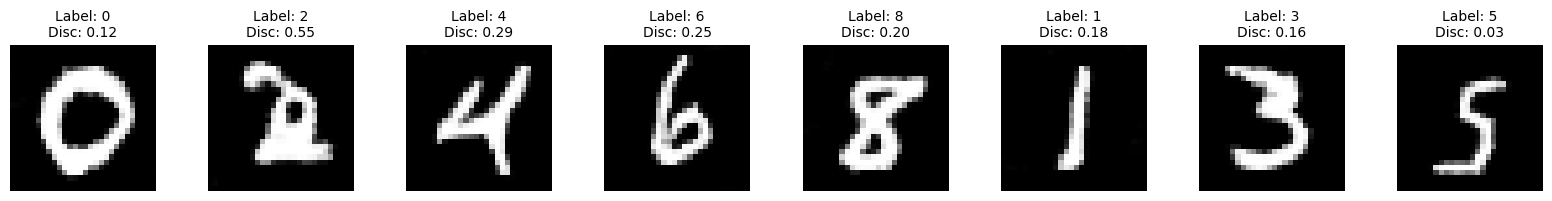

In [ ]:
# generator와 discriminator 작동 확인 및 시각화 (라벨, 판별자 결과 포함)
generator.eval()
discriminator.eval()

# 사용자가 직접 입력한 라벨 (예: [0, 2, 4, 6, 8, 1, 3, 5])
manual_labels = torch.tensor([0, 2, 4, 6, 8, 1, 3, 5], device=device)
batch_size = manual_labels.size(0)

# 입력 라벨에 맞춰 노이즈 생성
noise = torch.randn(batch_size, latent_dim, device=device)

# 생성자와 판별자 실행
with torch.no_grad():
    fake_images = generator(noise, manual_labels)
    disc_output = discriminator(fake_images, manual_labels)

print("생성된 이미지의 shape:", fake_images.shape)  # 예상: [batch_size, 1, 28, 28]
print("판별자 출력의 shape:", disc_output.shape)     # 예상: [batch_size, 1]

# 결과 시각화: 생성된 이미지와 라벨, 판별자 결과를 함께 표시
import matplotlib.pyplot as plt

fake_images_cpu = fake_images.detach().cpu().numpy()
disc_output_cpu = disc_output.detach().cpu().numpy()

fig, axs = plt.subplots(1, batch_size, figsize=(batch_size * 2, 2))
for i in range(batch_size):
    axs[i].imshow(fake_images_cpu[i, 0, :, :], cmap='gray')
    axs[i].axis('off')
    score = disc_output_cpu[i, 0]
    axs[i].set_title(f"Label: {manual_labels[i].item()}\nDisc: {score:.2f}", fontsize=10)
plt.tight_layout()
plt.show()
